#### keras를 이용한 손글씨 인식 딥러닝

In [5]:
# Data 불러오기
import pandas as pd 
train = pd.read_csv("../Data/train_20k.csv", header=None)
test = pd.read_csv("../Data/test_1k.csv", header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# 데이터 크기 확인하기
print(train.shape, test.shape)

(20001, 785) (1001, 785)


In [10]:
# 결측치 확인
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


In [ ]:
# Target의 허용 확인하기 - 1
targetCount = []

for i in sorted(train[0].unique()):
    print(i, ":", len(train[train[0]==i]))
    targetCount.append(len(train[train[0]==i]))

0 : 1994
1 : 2281
2 : 1929
3 : 2076
4 : 1945
5 : 1776
6 : 1971
7 : 2093
8 : 1922
9 : 2014


In [13]:
import numpy as np
np.min(targetCount) / np.max(targetCount)

0.7786058746163963

In [15]:
# Target의 허용 확인하기 - 2

train[0].value_counts().min() / train[0].value_counts().max()

0.7786058746163963

#### train과 test를 Target(Label)과 Feature(Data)로 분리하고 정규화 하기

In [28]:
train_label = train.loc[:,train.columns == 0]
train_data = train.loc[:,train.columns != 0]
train_data = train_data / 255

test_label = test.loc[:,test.columns == 0]
test_data = test.loc[:,test.columns != 0]
test_data = test_data / 255

In [29]:
print(train_label[:5])
print(train_data[:5])
print("*" * 20)
print(test_label[:5])
print(test_data[:5])

   0
0  5
1  0
2  4
3  1
4  9
   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 784 columns]
********************
   0
0  7
1  2
2  1
3  0
4  4
   1    2    3    4    5    6    7    8    9    10   ...  775  776  777  778  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [30]:
print(train_data.shape, train_label.shape)

(20001, 784) (20001, 1)


#### Deep Learning Model 만들기
- 입력층
- 은닉층 : activation='relu'
- 출력층 

In [31]:
from tensorflow import keras
from tensorflow.keras.layers import Input

In [32]:
model = keras.Sequential()
# 입력층
model.add(
    Input(shape=(784,))
)

# 은닉층
model.add(
    keras.layers.Dense(
        512,
        activation='relu'
    )
)

# 출력층
model.add(
    keras.layers.Dense(
        10,
        activation='softmax'
    )
)

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
784*512 + 512

401920

#### 손실함수
- optimizer = 'adam'

In [36]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

#### 훈련
- epochs = 10

In [37]:
hist = model.fit(
            np.array(train_data),
            np.array(train_label),
            epochs=10
)

Epoch 1/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8475 - loss: 0.5225
Epoch 2/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9488 - loss: 0.1749
Epoch 3/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9788 - loss: 0.0745
Epoch 4/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9824 - loss: 0.0603
Epoch 5/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9919 - loss: 0.0302
Epoch 6/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9933 - loss: 0.0243
Epoch 7/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9953 - loss: 0.0174
Epoch 8/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9956 - loss: 0.0165
Epoch 9/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9975 - loss: 0.0101
Epoch 10/10
626/626 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9941 - loss: 0.0194


#### 테스트 데이터로 평가하기

In [38]:
model.evaluate(
        test_data,
        test_label
)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9831 - loss: 0.0624  


[0.08935800939798355, 0.9750249981880188]

----
#### test_data로 predict해보기

In [41]:
pred = model.predict(test_data)
print('test label :', test_label[:10])
print("-----------")
print('pred :', np.argmax(pred[:10], axis=1)) 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
test label :    0
0  7
1  2
2  1
3  0
4  4
5  1
6  4
7  9
8  5
9  9
-----------
pred : [7 2 1 0 4 1 4 9 5 9]


----
#### 번외 : Image 만들기

In [42]:
from PIL import Image

In [43]:
train.shape

(20001, 785)

In [44]:
# 0번의 정답을 제외한 데이터 만들기
train1 = train.loc[:,train.columns !=0]
train1.shape

(20001, 784)

In [47]:
# train1의 50번의 크기 조절
abc = np.array(train1.iloc[50]).reshape(28, 28)
abc.shape

(28, 28)

In [48]:
# image 만들기
image = Image.fromarray((abc).astype(np.uint8))
image

In [49]:
# image 저장하기
image.save("../Data/mnist_test_3.jpg", "JPEG")

----
#### 이미지를 불러서 Predict 해보기

In [50]:
# Image 불러오기
img = Image.open("../Data/mnist_test_3.jpg")
img

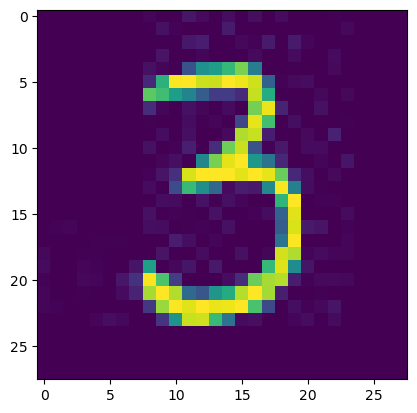

In [51]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

In [52]:
# image를 numpy배열로 변환
imgArray = np.array(img)
imgArray = imgArray / 255
imgArray.shape

(28, 28)

In [57]:
# image를 1차원 배열로 변경
imgArray2 = imgArray.reshape(-1)
imgArray2.shape

(784,)

In [62]:
imgArray3 = imgArray2.tolist()
dfArray = pd.DataFrame(imgArray3)
dfArray = dfArray.T
dfArray

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
np.argmax(model.predict(dfArray), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([3], dtype=int64)